# Домашнее задание 5

В этом задании предлагается поближе познакомиться с `решающими деревьями` и `случайными лесами`, а также поучаствовать в соревновании **House Prices: Advanced Regression Techniques**

Оформление дз:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.

**Дедлайн: 25 апреля 23:59**

при составлении ДЗ использованы материалы кафедры **АТП**

## Теоретическая часть
#### 1.5 балла

1. Что такое решающее дерево? Почему так называется?
**Это, грубо говоря, такой достаточно типичный алгоритм, который, чтобы определить класс объекта как бы проводит этот 
объект по какой-то схемке( графу ), где на каждом шаге он принимает решение, основываясь
,как правило, на значении какого-то признака, в какую "веточку" этот объект дальше пихать
. Когда же объект доходит до какого-то "листика" дерева, определяется и его класс. Называется так потому, что, очевидно,
на каждом шаге решает, овечает на какой-то вопрос: да/нет или что-то более сложное.**
2. В чем основная идея этого алгоритма?
**Собственно говоря, основная идея в том, чтобы как-то на каждом шаге по какому-то признаку стараться объекты тренировочной выборки
максимально разделить. Подразумевается, что так мы довольно эффективно будем делить объекты. Мы как бы каждый раз берём группу
объектов, смотрим, по какому признаку объекты, попавшие в эту группу, наиболее отличаются друг от друга и по нему же и разделяем.
Суть в чём. У нас как бы все объекты как-то разделяются внутри выборки. Соответственно, тестовый объект тоже будет относиться к какой-то
группе. И для этой группы будут действовать какие-то свои правила. Типа для мужчин ( и только для мужчин) возрастом выше 9.5 шанс
выжить мал. И если мы отнесли какой-то объект к группе "мужчины", то мы  знаем какие-то особенности именно ЭТОЙ группы
и уже можем что-то решать для этого объекта эффективней, чем в общем случае.
Так получается, на мой взгляд, достаточно результативно и интересно.**
3. Что такое решающее правило?
**Что-то в этом духе:**
    if condition1==True:
        ...
    elif condition2:
        ...
    ...
    else:
        ...
    **Если конкретнее. Это как бы правило, по которому объекты разбиваются в узле. Например, мы можем сказать так:
        нам надо, чтобы после разбиения объекты разделились на две группы так, чтобы в каждой из них объекты были максимально
        однородны по классу. 
    Решать же будем на основе какого-то признака.**
4. Что можно сказать про проблему переобучения для решающих деревьев?
**Суть в том, что если мы сделаем дерево слишком глубоким, то оно будет выдавать точный результаты для тренировочный выборки,
но на тестовой лажать по полной. Мы создадим это дерево очень чувствительным к каким-то, возможно, незначительным
признакам, по которым можно было бы разделить ТОЛЬКО объекты обучающей выборки. Если же мы делаем дерево маленьким,
дерево просто не сможет переобучиться, так как оно не имеет даже малейшего шанса обратить внимание на какие-то маленькие детальки и 
будет действовать глобально -  а так лучше, ибо тогда и на других данных алгоритм будет работать прекрасно, ведь 
это глобальные правила, скорее всего, соблюидаются для всех объектов, уникальные же правила( мелочи ) характерны только
для тренировочной выборки, и их лучше не учитывать. Т.е. сделать дерево неглубоким.**
5. Что такое отбор признаков по feature_importance? 
**Не все признаки нужны, не все признаки важны. Мы тщательно рассматриваем признаки и определяем, можно ли как-то по нему
более или менее нормально разбить выборку на относительно однородные группы. От успеха этого мероприятия зависит, какую
важность мы присвоим признаку. А от этой важности признака мы сможем определить, нужно ли его вообще учитывать, али лучше выбросить.
**
6. Что такое PCA?
**Это то, чему была полностью посвящена прошлая лекция.
Грубо говоря, мы отбираем самые - самые главные признаки, но не совсем. Как бы, если у нас есть система координат какая-то,
где оси - признаки, на которой определены точки - объекты, мы можем построить новую систему координат, урезав
количество осей, так, чтобы дисперсия при заданном количестве осей была максимальна. Такой подход позволяет
лучше различать объекты и как-то их классифицировать, при это зачастую при снижении осей дисперсия увеличивается, и это классно!**

## Практическая чать 1. Решающие деревья
#### 3.5 балла
Здесь предлагается использовать решающие деревья для того, чтобы поработать с датасетом, в котором содержится информация о картинках с ядовитыми и съедобными грибами: https://www.kaggle.com/uciml/mushroom-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# считайте данные из датасета при помощи функции read_csv:
df = pd.read_csv('mushrooms.csv')

In [2]:
# проверьте, что в датасете нет пустых строк:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [2]:
from sklearn.model_selection import train_test_split


# Разбейте данные на тестовую и тренировочную части
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x) # О_о Автоматический перевод признаков в цифровой вид. Прикольно!
y = pd.get_dummies(y)
# Посмотрите на информацию о данных. Что вы можете сказать о них? 
x.info()
y.info()
#x.dtypes# uint8 все - уже перведены.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
e    8124 non-null uint8
p    8124 non-null uint8
dtypes: uint8(2)
memory usage: 15.9 KB


**Данные представляют собой set из 8124 объектов, у каждого из которых есть по 22 признака. Эти признаки уже оцифрованы
( с помощью ф-и get_dummies) и представлены в типе uint8**

Займемся отбором параметров. Используем кросс-валидацию

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn import tree # здесь лежит нужный нам классификатор DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }

tr = tree.DecisionTreeClassifier()# передайте сюда классификатор (решающее дерево)
gsearch = GridSearchCV(tr, parameters)
q=gsearch.fit(x,y)
model = gsearch.best_estimator_
gsearch.cv_results_
scores = cross_val_score(model, X_train, y_train, cv=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
scores

array([ 1.        ,  0.99938462,  1.        ,  1.        ])

In [79]:
print(q)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'min_samples_split': [2, 3, 4, 5], 'max_depth': [9, 10, 11, 12], 'class_weight': ('balanced', None), 'presort': (False, True)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


 Выведите `gsearch`. Что вы можете сказать об этом? Что это и зачем нужно?
** По сути, эта такая штука, которая определяет, какие параметры дают лучший результат. Т.е., используя какие параметры, функция 
даёт наиболее точный результат. Как бы сравнитель параметров - даём ему estimator - сам алгоритм, и все возможные параметры к нему.**

In [80]:
# Посчитайте скор
score = model.score(X_test, y_test)
print(score)#...

1.0


Давайте посмотрим, как же устроено наше дерево? Сделать можно это с помощью следующего кода: 

P.S. возможно, что вам придется установить библиотеку `graphviz`. Устанавливается она точно также, как и любая другая бибилиотека.

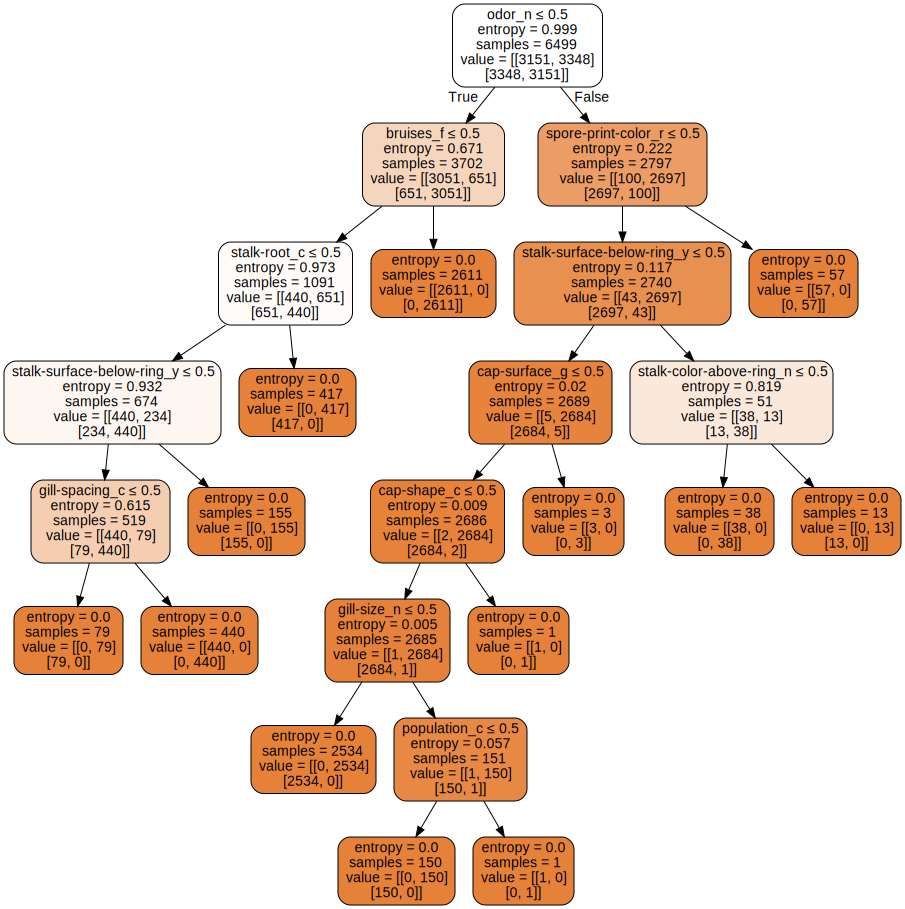

In [82]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=y_test.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

Какие выводы вы можете сделать об устройстве решающего дерева?


**Здесь древо получилось переобученным, это очевидно ( score==1, lol ). Устройство просто, как пень. На каждом шажочке
находим какое-нибудь условие, по которому можно очень хорошо распределить объекты. Прописываем это условия и так распеределяем.
Повторяем до критерия останова ( здесь он не указан, поэтому, видимо, автоматически алгоритм рассматривает все объекты до 
                                тех пор, пока в каждом листике не останутся только объекты одного класса.)**

## Практическая часть 2. Случайные леса.
### 2 балла
В этой части задания мы будем работать с датасетом https://www.kaggle.com/c/house-prices-advanced-regression-techniques c `kaggle`.

Предложенный код можно использовать как угодно -- если вам удобнее написать все свое, можете все удалить

In [2]:
%matplotlib inline
import copy

In [184]:
# скачайте данные train и test при помощи функции read_csv 
train = pd.read_csv('train.csv')
y_train= train.SalePrice
test = pd.read_csv('test.csv')

In [185]:
# выведите названия столбцов. 
# Предположите, какие из них могут быть важны, исходя из вашего жизненного опыта и интуиции?
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Важные на мой взгляд столбцы. Основываясь на их описаниях, будем об этом судить. Как я понял, будем мы предсказывать
цены на недвижимость. Разберём каждую характеристику, которую я считаю значимой.
MSSubClass: The building class - очевидно, что тип здания крайне влияет на всё - это очень масштабная характеристика.
LotArea: Lot size in square feet - квадратные метры, очевидно, решают. Причём вполне себе линейно.
Street: Type of road access - понятно, что чем доступнее дорожная сеть, тем дороже стоит дом.
Alley: Type of alley access - вид выхода на улицу тоже решает - это комфорт.
Utilities: Type of utilities available - коммуналка решает. Кто захочет бегать в сортир на улице?
Condition1: Proximity to main road or railroad - здесь шум от главных дорог снизит цену (неприятно жить, когда рядышком всё время что-то шумит)
Condition2: Proximity to main road or railroad (if a second is present) - то же самое
BldgType: Type of dwelling- опять же, тип решает
OverallCond: Overall condition rating - состояние тоже важно. В развалюхе жить - как же не тужить?
ExterCond: Present condition of the material on the exterior- вневшний вид для многих важен
Heating: Type of heating - решает, ибо дровишками печку топить сейчас не особо модно
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet  - опять же, метры решают для многих всё
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens ( Бывают две кухкни и ванны, ват???) - ну тип видимо тоже решает, если их больше, то и цена выше
TotRmsAbvGrd: Total rooms above grade  - кол-во комнат - один из важнейших параметров
Functional: Home functionality rating- всякие рейтинги всегда учитываются. Ну тут как бы рейтинг "of usability"
GarageType: Garage location - гараж для многих - это всё ( там порой люди пропадают, увлекаются ремонтом машин)
GarageCars: Size of garage in car capacity - насколько большая машина влазит, тоже влияет, очевидно.
GarageCond: Garage condition - состояние всегда, в принципе-то, влияет.
**


**Остальные штуки либо посчитал неважными, либо не смог понять, что это за ересь такая, а потому посчитал неважными.**

выделим необходимые данные:

In [186]:
labels = train.SalePrice

In [187]:
labels.head(4)

0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64

In [188]:
train['SalePrice'].head(4)

0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64

Постройте график распределения цен на жилье. Какое распределение оно вам напоминает?

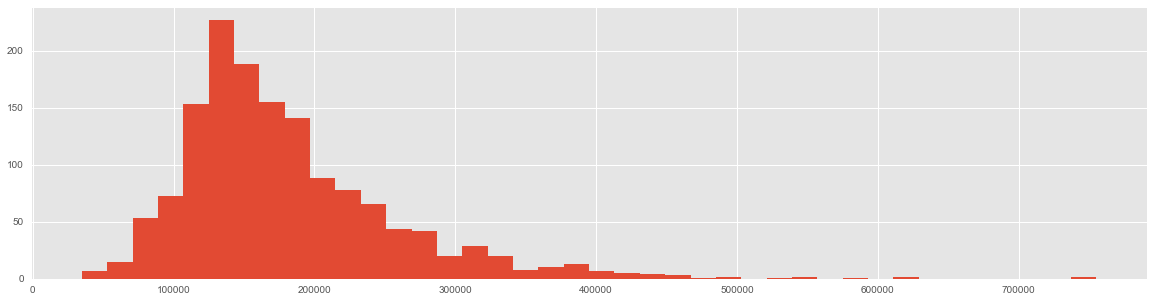

In [189]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.hist(labels,bins=40)
plt.show()

In [190]:
# На мой взгляд, это похоже на какую-то как бы тучку - по цетру очень много объектов, по краям - мало. Но только тучка линейна.( В том смысле, что представлена на вот таком графике)
# У нас были такие штуки( когда PCA проходили)

In [191]:
# выведите данные
print(train.shape)


(1460, 81)


Cоздадим датасет и назовем его `all` из конкатенации train, test.

P.S. Если будете использовать функцию `concat`, не забудьте установить `axis`=0

In [192]:
all = pd.concat([train, test], axis=0)
all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


Заменим пустые данные `null` на средние значения и отформатируем данные:

In [193]:
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
Id             	0.00	1460
MSSubClass     	0.00	15
MSZoning       	0.00	5
LotFrontage    	0.18	110
LotArea        	0.00	1073
Street         	0.00	2
Alley          	0.94	2
LotShape       	0.00	4
LandContour    	0.00	4
Utilities      	0.00	2
LotConfig      	0.00	5
LandSlope      	0.00	3
Neighborhood   	0.00	25
Condition1     	0.00	9
Condition2     	0.00	8
BldgType       	0.00	5
HouseStyle     	0.00	8
OverallQual    	0.00	10
OverallCond    	0.00	9
YearBuilt      	0.00	112
YearRemodAdd   	0.00	61
RoofStyle      	0.00	6
RoofMatl       	0.00	8
Exterior1st    	0.00	15
Exterior2nd    	0.00	16
MasVnrType     	0.01	4
MasVnrArea     	0.01	327
ExterQual      	0.00	4
ExterCond      	0.00	5
Foundation     	0.00	6
BsmtQual       	0.03	4
BsmtCond       	0.03	4
BsmtExposure   	0.03	4
BsmtFinType1   	0.03	6
BsmtFinSF1     	0.00	637
BsmtFinType2   	0.03	6
BsmtFinSF2     	0.00	144
BsmtUnfSF      	0.00	780
TotalBsmtSF    	0.00	721
Heating        	0.00	6
HeatingQC      	0.00	5
Ce

Используйте известные вам методы для отбора признаков. Удалите ненужные признаки.
Не забудьте нормализовать (оцифровать) данные!

In [194]:
# тут ваш код


# Сначала оцифруем!
all2=copy.deepcopy(all)

for i in all2.columns:
    if all2[i].dtype=='object':
        for j, k in enumerate(all2[i].unique()):
            all2.loc[all2[i]==k, i]=j



# Теперь заменим пустные данные на средние значения!


for i in all2.columns:
    if all2[i].isnull().mean()!=0:
        all2[i] = all2[i].fillna(all2[i].median())

        
# Давайте найдём самые бесползеные признаки:
# Для этого посмотрим, какие признаки либо имеют одно значение у всех объектов, либо, обратно, у каждого практически уникальное значение.
my_drop=[]
my_labels=[]
for i in all2.columns:
    delta= max(all2[i].value_counts())/sum(all2[i].value_counts())
    if (delta<0.1 or delta>0.5):
        my_drop.append(i)
    else:
        my_labels.append(i)
print(my_drop)
print(my_labels)


['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape', 'LowQualFinSF', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'OverallCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF', 'YearBuilt']
['BsmtFinSF1', 'BsmtFinType1', 'BsmtQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces', 'Foundation', 'GarageFinish', 'LotFrontage', 'MSSubClass'

In [195]:
# some useless features
all["MiscFeature"].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [196]:
# some useless features
sum(train["MiscFeature"].value_counts())

54

In [197]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [198]:
#to_drop = ["MiscFeature", "PoolQC"]
#to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

#for col in to_replace_to_none:                                      ЗАЧЕМ это? Хз, итак всё работает.
    #тут ваш код

# наверное, тут надо было заменить на средние значения? Ща сделаем

all.drop(my_drop, axis=1, inplace=True, errors="ignore")


#Нормализация:

for i in all.columns:
    if all[i].dtype=='object':
        for j, k in enumerate(all[i].unique()):
            all.loc[all[i]==k, i]=j

for i in all.columns:
    if all[i].isnull().mean()!=0:
        all[i] = all[i].fillna(all[i].median())
    
#all.fillna(-1, inplace=True)                                               #ТОГДА ЭТО ЗАЧЕМ?

Визуализируем данные:

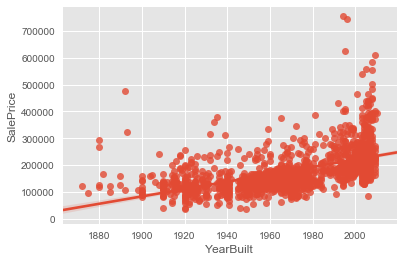

In [199]:
sns.regplot(train["YearBuilt"], labels)

Что можно сказать о таком распределении данных?

'\nA\tAgriculture\nC\tCommercial\nFV\tFloating Village Residential\nI\tIndustrial\nRH\tResidential High Density\nRL\tResidential Low Density\nRP\tResidential Low Density Park \nRM\tResidential Medium Density\n'

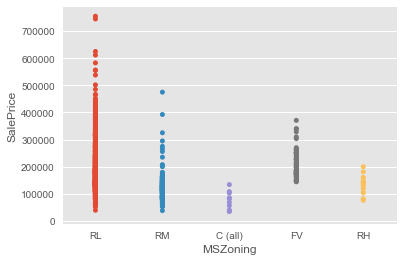

In [126]:
sns.stripplot(train["MSZoning"], labels)
"""
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density
"""

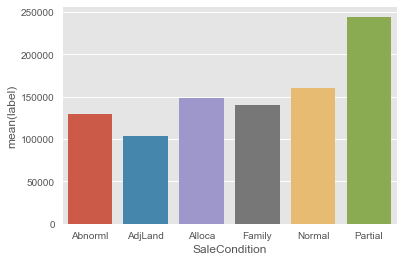

In [127]:
group_col = "SaleCondition"

train_with_labels = train.copy()
train_with_labels["label"] = labels
groupped = train_with_labels.groupby(group_col).median().reset_index()[[group_col, "label"]]
sns.barplot(groupped[group_col], groupped.label)

In [200]:
categorial = my_labels
for col in categorial:
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]
train.shape

(1460, 17)

In [201]:
from sklearn.feature_extraction import DictVectorizer
 
#  энкодер, которым Вы можете воспользоваться
def encode_onehot(df, cols):

    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df



In [202]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=0)

In [79]:
# выведите ваш датасет. Посмотрите, как он выглядит после нормализации и отбора признаков?
test

,BsmtFinSF1,BsmtFinType1,BsmtQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,GarageFinish,LotFrontage,MSSubClass,MoSold,Neighborhood,OpenPorchSF,OverallQual,TotRmsAbvGrd,YearRemodAdd,YrSold
0,135,3,1,0,0,0,1,1,1,1,11,11,1,3,4,39,4
1,637,1,1,2,5,0,1,1,32,1,11,11,38,1,1,46,4
2,638,0,0,0,0,1,0,2,21,0,10,17,82,3,1,30,4
3,584,0,1,0,0,1,0,2,37,0,11,17,38,1,2,30,4
4,639,1,0,3,3,0,0,0,67,7,8,18,30,2,4,36,4
5,8,2,0,3,3,1,0,2,6,0,7,17,4,1,2,54,4
6,640,1,0,3,3,0,0,2,2,1,10,17,9,1,1,12,4
7,8,2,0,0,0,1,0,2,30,0,1,17,33,1,2,30,4
8,323,0,0,3,3,1,0,1,5,1,0,17,1,0,4,20,4
9,587,1,1,7,4,0,1,2,9,1,7,11,1,5,6,3,4


In [3]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#to_encode = my_labels
#df = train
#for column in to_encode:
#    le = LabelEncoder()
#    df[column] = le.fit_transform(df[column])




**Я так понимаю, мне эта штука не нужна, т.к. я уже всё оцифровал**

Функция для формирования посылки в `kaggle`

In [4]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)


In [130]:
test.head()

,BsmtFinSF1,BsmtFinType1,BsmtQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,GarageFinish,LotFrontage,MSSubClass,MoSold,Neighborhood,OpenPorchSF,OverallQual,TotRmsAbvGrd,YearRemodAdd,YrSold
0,135,3,1,0,0,0,1,1,1,1,11,11,1,3,4,39,4
1,637,1,1,2,5,0,1,1,32,1,11,11,38,1,1,46,4
2,638,0,0,0,0,1,0,2,21,0,10,17,82,3,1,30,4
3,584,0,1,0,0,1,0,2,37,0,11,17,38,1,2,30,4
4,639,1,0,3,3,0,0,0,67,7,8,18,30,2,4,36,4


In [209]:
#train = encode_onehot (train,train.columns)
#y_train
clf = RandomForestRegressor()
clf.fit(train, np.log1p(y_train))
preds = clf.predict(test)
submit(np.expm1(preds))
#submit(preds)

In [96]:
test

,BsmtFinSF1,BsmtFinType1,BsmtQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,GarageFinish,LotFrontage,MSSubClass,MoSold,Neighborhood,OpenPorchSF,OverallQual,TotRmsAbvGrd,YearRemodAdd,YrSold
0,135,3,1,0,0,0,1,1,1,1,11,11,1,3,4,39,4
1,637,1,1,2,5,0,1,1,32,1,11,11,38,1,1,46,4
2,638,0,0,0,0,1,0,2,21,0,10,17,82,3,1,30,4
3,584,0,1,0,0,1,0,2,37,0,11,17,38,1,2,30,4
4,639,1,0,3,3,0,0,0,67,7,8,18,30,2,4,36,4
5,8,2,0,3,3,1,0,2,6,0,7,17,4,1,2,54,4
6,640,1,0,3,3,0,0,2,2,1,10,17,9,1,1,12,4
7,8,2,0,0,0,1,0,2,30,0,1,17,33,1,2,30,4
8,323,0,0,3,3,1,0,1,5,1,0,17,1,0,4,20,4
9,587,1,1,7,4,0,1,2,9,1,7,11,1,5,6,3,4


In [41]:
def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])

In [6]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict

class MeanEncoder(BaseEstimator):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y):
        X_copy = X.copy()
        X_copy['target'] = y
        self.encoding = X_copy.groupby(col)['target'].mean()
        return self
        
    def predict(self, X):
        return X[col].map(self.encoding).fillna(-1)



def code_mean(train, test, labels, col, cv):
    mean_encoder = MeanEncoder(col)
    train_col = cross_val_predict(mean_encoder, train, labels, cv=cv)
    test_col = mean_encoder.fit(train, labels).predict(test)
    
    return train_col, test_col

Какой скор вам удалось получить? Как вы считаете, результат хороший или не очень?

**Получился скор 0.20684. Учитывая , что это среднее отклонение степени - как по мне, результат нормальный.**


## Практическая часть 3. Cлучайные леса.

#### 3 балла
Подумайте, какие образом можно улучшить скор?

Вот идеи:
1. Попробовать подобрать нужные параметры. Для этого можно исследовать данные, посмотреть, как они распределены и что важно, а что -- не очень
2. Найти, какие категориальные признаки являются ординальными и закодировать их соответственно
3. Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
4. Сгенерировать новые признаки


In [4]:
# Давайте попытаемся как-нибудь по-другому подобрать параметры. Ибо предыдущий отбор параметров был весьма условным.

In [61]:
train = pd.read_csv('train.csv')
y_train= train.SalePrice
test = pd.read_csv('test.csv')
all = pd.concat([train, test], axis=0)
all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [62]:
import copy
all2=copy.deepcopy(all)

for i in all2.columns:
    if all2[i].dtype=='object':
        for j, k in enumerate(all2[i].unique()):
            all2.loc[all2[i]==k, i]=j


for i in all2.columns:
    if all2[i].isnull().mean()!=0:
        all2[i] = all2[i].fillna(all2[i].median())
        



In [63]:
all2.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1.0,3,0,0.0,0.0,706.0,0.0,...,0.0,0,0,8,856.0,0.0,0,2003,2003,2008
1,1262,0,0,1.0,3,0,0.0,1.0,978.0,0.0,...,0.0,0,0,6,1262.0,0.0,298,1976,1976,2007
2,920,866,0,1.0,3,0,0.0,2.0,486.0,0.0,...,0.0,0,0,6,920.0,0.0,0,2001,2002,2008
3,961,756,0,1.0,3,0,1.0,0.0,216.0,0.0,...,0.0,0,0,7,756.0,0.0,0,1915,1970,2006
4,1145,1053,0,1.0,4,0,0.0,3.0,655.0,0.0,...,0.0,0,0,9,1145.0,0.0,192,2000,2000,2008


In [64]:
#V2
from sklearn.model_selection import cross_val_score
from sklearn import tree # здесь лежит нужный нам классификатор DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

parametrs = all2.columns.drop('SalePrice')
# Поступим так - будем брать только один параметр и смотреть, какой для него скор. Так найдём какие-то параметры,
# что хоть как-то влияют на ответ.

#Лучше так- берём все параметры, и дропаем один из них . Где скор ниже, тот параметр важнее
parametrs_scor=[]
train = all2.iloc[:train.shape[0]]
test = all2.iloc[train.shape[0]:]
y_train= train.SalePrice
y_trainff= train.SalePrice

train=train.drop('SalePrice', axis=1)
test=test.drop('SalePrice', axis=1)

from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(y_actual, y_predicted))

X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.3, random_state=2)

for parametr in parametrs:
    tr = tree.DecisionTreeRegressor()
    x_train=X_train.drop(parametr,axis=1)
    tr.fit(x_train,y_train)
    y_pred=tr.predict(X_test.drop(parametr,axis=1))
    scor=explained_variance_score(y_pred, y_test)
    parametrs_scor.append(scor)

In [65]:
#V2
from sklearn.model_selection import cross_val_score
from sklearn import tree # здесь лежит нужный нам классификатор DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

parametrs = all2.columns.drop('SalePrice')
# Поступим так - будем брать только один параметр и смотреть, какой для него скор. Так найдём какие-то параметры,
# что хоть как-то влияют на ответ.

#Лучше так- берём все параметры, и дропаем один из них . Где скор ниже, тот параметр важнее
parametrs_scor=[]
train = all2.iloc[:train.shape[0]]
test = all2.iloc[train.shape[0]:]
y_train= train.SalePrice
y_trainff= train.SalePrice

train=train.drop('SalePrice', axis=1)
test=test.drop('SalePrice', axis=1)



X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.3, random_state=2)

for parametr in parametrs:
    tr = tree.DecisionTreeRegressor()
    x_train=X_train.drop(parametr,axis=1)
    tr.fit(x_train,y_train)
    y_pred=tr.predict(X_test.drop(parametr,axis=1))
    scor=explained_variance_score(y_pred, y_test)
    parametrs_scor.append(scor)

In [42]:
parametrs_scor=np.array(parametrs_scor)
parametrs_scor.argsort()

array([38,  6, 31, 58, 15, 72, 47,  1, 35, 29, 73, 67, 25, 52, 33, 79, 62,
       69, 57, 17, 13,  5, 76, 36, 21, 68, 18, 49, 24, 28, 56, 14, 78, 71,
       10, 65, 74, 23, 22,  2, 50, 26, 60, 54, 66, 11, 30,  9, 39, 77, 70,
       48, 44, 59, 53,  4, 20, 34, 51, 12,  7, 42, 61, 45, 16, 75, 32, 41,
       43, 27, 64,  3, 40, 55,  0, 37, 19, 46, 63,  8], dtype=int64)

In [10]:
#V2
parametrs_scor=np.array(parametrs_scor)
parametrs_scor.argsort()
parametrs_scor[8]

0.70024603730487023

In [66]:
# Теперь мы знаем, в каком порядке элементы распределены по важности. Возьмём 10 самых важных.
pars=parametrs_scor.argsort()[:20]
tr = tree.DecisionTreeRegressor()           
y_train= y_trainff
tr.fit(train[train.columns[pars]],np.log1p(y_train))
y_pred=tr.predict(test[train.columns[pars]])
#for i in range(y_pred):
#    y_pred[i]=int(y_pred[i])
submit(np.expm1(y_pred))

AttributeError: 'list' object has no attribute 'argsort'

In [44]:
# При разном кол-ве признаков скор получается 0.29-0.35, что, будем честными, ухудшение предыдущего.

**Попробуем по-другому!**

In [ ]:
# Выберем один самый- самый значащий признак. Прям супер-признка.

In [18]:
train.columns[parametrs_scor.argsort()[0]]

'TotalBsmtSF'

In [45]:
# Пусть теперь этот признак у нас - самый главный
# V1 WITH NO RMSE
from sklearn.metrics import explained_variance_score
parametrs=['TotalBsmtSF']
y_train= y_trainff
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.3, random_state=17)
y_test=np.array(y_test)
pars=X_train.columns.drop('TotalBsmtSF')
pars=list(pars) # чтобы не было странного класса от columns
n=10 # колв-о доп. параметров

from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(y_actual, y_predicted))

for i in range(n):
    minacc=10001
    for j in pars:
        my_pars=copy.deepcopy(parametrs)
        my_pars.append(j)
        tr = tree.DecisionTreeRegressor()
        my_train=X_train[my_pars]
        tr.fit(my_train,y_train)
        y_pred=tr.predict(X_test[my_pars])
        scor=accuracy_score(y_test, y_pred.round())
        if scor< minacc:
            minacc=scor
            minpar=j
    parametrs.append(minpar)
    pars.remove(minpar)

In [74]:
#V2 with RMSE

from sklearn.metrics import explained_variance_score
parametrs=['TotalBsmtSF']
y_train= y_trainff
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.3, random_state=17)
y_test=np.array(y_test)
pars=X_train.columns.drop('TotalBsmtSF')
pars=list(pars) # чтобы не было странного класса от columns
n=11 # колв-о доп. параметров

from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(y_actual, y_predicted))

for i in range(n):
    minloss=10**10
    for j in pars:
        my_pars=copy.deepcopy(parametrs)
        my_pars.append(j)
        tr = tree.DecisionTreeRegressor()
        my_train=X_train[my_pars]
        tr.fit(my_train,y_train)
        y_pred=tr.predict(X_test[my_pars])
        loss=sqrt(mean_squared_error(y_test, y_pred.round()))
        if loss<minloss:
            minloss=loss
            maxpar=j
    parametrs.append(maxpar)
    pars.remove(maxpar)

In [75]:
tr = tree.DecisionTreeRegressor()           
y_train= y_trainff
tr.fit(train[pars],np.log1p(y_train))
y_pred=tr.predict(test[pars])
#for i in range(y_pred):
#    y_pred[i]=int(y_pred[i])
submit(np.expm1(y_pred))

In [76]:
np.expm1(y_pred)

array([ 111250.,  154000.,  274300., ...,  158500.,   80000.,  250000.])

In [91]:
parametrs

['TotalBsmtSF',
 'MSSubClass',
 'OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageCars',
 'Fireplaces',
 'YearBuilt',
 '2ndFlrSF',
 'OverallCond',
 'GarageFinish',
 'GarageCond']

In [48]:
#y_train= y_trainff

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train[pars], y_train, test_size=0.2, random_state=2)
#model=tree.DecisionTreeRegressor()  
#scores = cross_val_score(model, X_train, y_train, cv=4)

In [81]:
#scores

**Пусть теперь эти отобранные признаки - основные ( при них скор 0.0.20981)**

In [103]:
#X_train=train[['TotalBsmtSF', 'MSSubClass', 'BsmtQual', '2ndFlrSF', 'Fireplaces', 'LandSlope', 'Utilities', 'YearRemodAdd', 'BsmtExposure', 'RoofMatl', 'KitchenAbvGr', 'GarageType']]
#X_test=test[['TotalBsmtSF', 'MSSubClass', 'BsmtQual', '2ndFlrSF', 'Fireplaces', 'LandSlope', 'Utilities', 'YearRemodAdd', 'BsmtExposure', 'RoofMatl', 'KitchenAbvGr', 'GarageType']]
X_train=train[parametrs]
X_test=test[parametrs]
y_train=y_trainff
#X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.3, random_state=17)
X_train.shape

(1460, 12)

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error


parameters = {'min_samples_split':[2,3,4,5], 
              'max_depth':[10,11,12,13,14,15, None],
              'presort':(False,True),
             }

tr = tree.DecisionTreeRegressor()
gsearch = GridSearchCV(tr, parameters, verbose=1, scoring=make_scorer(mean_squared_error))
q=gsearch.fit(X_train,np.log1p(y_train))
model = gsearch.best_estimator_
gsearch.cv_results_
scores = cross_val_score(model, X_train, y_train, cv=4)
model.fit(X_train, np.log1p(y_train))

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    1.2s finished


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [105]:
gsearch.best_score_

0.045830877800511212

**Теперь чекнем скор**

In [102]:
y_pred=model.predict(X_test)
#for i in range(y_pred):
#    y_pred[i]=int(y_pred[i])
submit(np.expm1(y_pred))

In [56]:
#gsearch.cv_results_


In [98]:
scores

array([ 0.73534734,  0.79017338,  0.68691723,  0.74353893])

In [ ]:
#2

In [80]:
X_train.columns

Index(['TotalBsmtSF', 'MSSubClass', 'BsmtQual', '2ndFlrSF', 'Fireplaces',
       'LandSlope', 'Utilities', 'YearRemodAdd', 'BsmtExposure', 'RoofMatl',
       'KitchenAbvGr', 'GarageType'],
      dtype='object')

In [106]:
# Чекаем на ординальность. Во-первых, посмотрим, для каких признаков слишком много различных значений.
# Очевидно, что они являются какими-то числовыми значениями, как бы просто значениями, т.е. зависимостью
# количественной, а не качественной. Т.е. неординальной
candidats=[]
not_candidats=[]
for i in X_train.columns:
    if len(X_train[i].unique() )<10:
        candidats.append(i)
    else:
        not_candidats.append(i)
print(candidats)

['GarageCars', 'Fireplaces', 'OverallCond', 'GarageFinish', 'GarageCond']


In [107]:
# Как видно, почти все из представленных признаков могут быть кандидатами. Чекнем каждый
#1) BsmtQual - высота подвала
#Ex	Excellent	100+     Закодируем 4
#Gd	Good	90-99             3
#TA	Typical	80-89               2
#Fa	Fair	70-79               1
ttrain= pd.read_csv('train.csv')
ttrain=ttrain[X_train.columns]
ttest=pd.read_csv('test.csv')[X_train.columns]
tall = pd.concat([ttrain, ttest], axis=0)

In [108]:
for j, k in enumerate(['Ex', 'Gd', 'TA', 'Fa'][::-1]):
    tall.loc[tall['BsmtQual']==k, 'BsmtQual']=j

KeyError: 'BsmtQual'

In [25]:
#2) Fireplacec. Вообще, это количественный признак - число этих штук ( каминов, лол). Так что он нам не нужен.

In [26]:
#3) LandSlope - Slope of property - наклон земли
#Gtl	Gentle slope  Норм наклон - 3
#Mod	Moderate Slope	            -2
#Sev	Severe Slope    плохой       -1
for j, k in enumerate(['Gtl', 'Mod', 'Sev'][::-1]):
    tall.loc[tall['LandSlope']==k, 'LandSlope']=j

In [27]:
#4)Utilities - Type of utilities available - Очедь даже качественная штука
#AllPub	All public Utilities (E,G,W,& S)	                  2
#NoSeWa	Electricity and Gas Only                                  1
for j, k in enumerate(['AllPub', 'NoSeWa'][::-1]):
    tall.loc[tall['Utilities']==k, 'Utilities']=j

In [28]:
#5) BsmtExposure  - тоже какая-то качественная штука про стены
#Gd	Good Exposure
#Av	Average Exposure (split levels or foyers typically score average or above)	
#Mn	Mimimum Exposure
#No	No Exposure
# По той же схеме работаем 
for j, k in enumerate(['Gd', 'Av', 'Mn', 'No'][::-1]):
    tall.loc[tall['BsmtExposure']==k, 'BsmtExposure']=j

In [29]:
#6) RoofMatl - материал крыши. В общем-то, если там и есть какая-то зависимость, то она неочевидна ( я нз, что лучше - метал или дерево)


In [30]:
#7) KitchenAbvGr
ttrain['KitchenAbvGr'].unique()
# Я не нашёл какой-то инфы по этому признкаку, но видно, что это какое-то уже уопрядоченное количество, не прикасаемся к нему.

array([1, 2, 3, 0], dtype=int64)

In [31]:
#8) GarageType - тип гаража - в принципе, тоже ординальный признак.
#2Types	More than one type of garage                       -6
#Attchd	Attached to home                               -5
#Basment	Basement Garage                               -4
#BuiltIn	Built-In (Garage part of house - typically has room above garage) -3
#CarPort	Car Port            -2
#Detchd	Detached from home        -1

for j, k in enumerate(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'][::-1]):
    tall.loc[tall['GarageType']==k, 'GarageType']=j

In [84]:
tall.head()

,TotalBsmtSF,MSSubClass,BsmtQual,2ndFlrSF,Fireplaces,LandSlope,Utilities,YearRemodAdd,BsmtExposure,RoofMatl,KitchenAbvGr,GarageType
0,856.0,60,2,854,0,2,1,2003,0,CompShg,1,4
1,1262.0,20,2,0,1,2,1,1976,3,CompShg,1,4
2,920.0,60,2,866,1,2,1,2002,1,CompShg,1,4
3,756.0,70,1,756,1,2,1,1970,0,CompShg,1,0
4,1145.0,60,2,1053,1,2,1,2000,2,CompShg,1,4


In [32]:
# У нас остался один не нормализированный признак, разделаемся с ним по старинке
for j, k in enumerate(tall['RoofMatl'].unique()):
    tall.loc[tall['RoofMatl']==k,'RoofMatl' ]=j

In [67]:
# Теперь найдём медианные значения
for i in tall.columns:
    if tall[i].isnull().mean()!=0:
        tall[i] = tall[i].fillna(tall[i].median())

In [69]:
train = tall.iloc[:ttrain.shape[0]]
test = tall.iloc[ttrain.shape[0]:]

In [35]:
#Вычислим получившийся скор!!
tr = tree.DecisionTreeRegressor()           
y_train= y_trainff
tr.fit(train,np.log1p(y_train))
y_pred=tr.predict(test)
#for i in range(y_pred):
#    y_pred[i]=int(y_pred[i])
submit(np.expm1(y_pred))
# 0,24. Пользователь, пожалуйста, проверьте, к какому месту на вашем телу прикреплены руки!!! Точно к плечам?

In [50]:
#3


**Будем считать, что уже отобранные категориальные признаки и есть самые главные, так как это категориальные признаки,
включённые в список самых главных признаков. Закодируем с помощью get_dummies**

**Как я выяснил, dummies кодирует те штуки, которым присвоен класс object**



In [36]:
tall = pd.concat([ttrain, ttest], axis=0)
print(tall.columns)
y_train= y_trainff
tall=pd.get_dummies(tall)
tall.head()
print(tall.columns)

Index(['TotalBsmtSF', 'MSSubClass', 'BsmtQual', '2ndFlrSF', 'Fireplaces',
       'LandSlope', 'Utilities', 'YearRemodAdd', 'BsmtExposure', 'RoofMatl',
       'KitchenAbvGr', 'GarageType'],
      dtype='object')
Index(['TotalBsmtSF', 'MSSubClass', '2ndFlrSF', 'Fireplaces', 'YearRemodAdd',
       'KitchenAbvGr', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'BsmtExposure_Av',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
       'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd'],
      dtype='object')


In [52]:
train = tall.iloc[:ttrain.shape[0]]
test = tall.iloc[ttrain.shape[0]:]

In [74]:
np.where(np.isnan(test))

(array([], dtype=int64), array([], dtype=int64))

In [76]:
tr = tree.DecisionTreeRegressor()           
y_train= y_trainff
tr.fit(train,np.log1p(y_train))
y_pred=tr.predict(test)
submit(np.expm1(y_pred))


In [79]:
#np.where(np.isnan(test))

In [82]:
np.expm1(y_pred)

array([ 120000.,  157900.,  193000., ...,  133900.,  118500.,  235000.])